1. Import all libraries
2. Read the Data into a Dataframe
3. Plotting the data
4. Transform data to meet LSTM requirements - The LSTM model will learn a function that maps a sequence of past observations as input to an output observation.
5. Train the model - 
6. Visualise actual values against predicted


In [8]:
import sys 
import datetime
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import tensorflow as tf
import keras
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM, GRU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

#from tensorflow.keras import backend

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mkleinbort/resource-datasets/master/bikeshare/bikeshare.csv')
data.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [3]:
#set the datetime index
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = (data
        .apply(lambda row: datetime.datetime(row['dteday'].year, row['dteday'].month,row['dteday'].day,row['hr']), 
        axis=1)
)


data = data.set_index(pd.DatetimeIndex(data['dteday']))

#hourly data
data2 =  pd.DataFrame(data.resample('h').mean()).drop(columns=['atemp'])

In [4]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,2,2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,3,2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,4,2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,5,2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


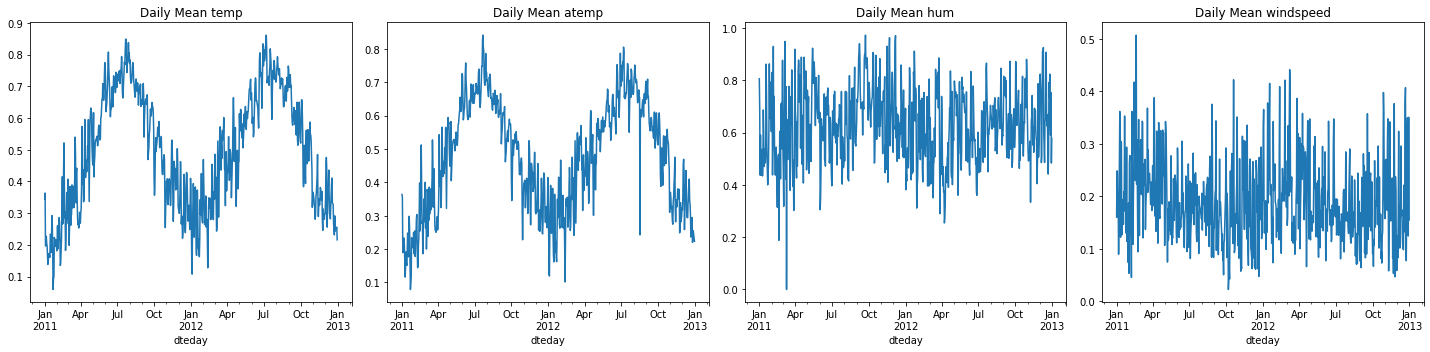

In [5]:
#resample = Convenience method for frequency conversion and resampling of time series.
#for resample Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex)
#Downsample the series into 1 dat bins and get the mean value of the timestamps falling into a bin.
columns = data.select_dtypes('float64').columns

fig, axes = plt.subplots(1, len(columns), figsize=(20, 5), sharex=False)
for col,ax in zip(columns,axes):
    (data[col]
     .resample('D')
     .mean()
     .plot(title=f'Daily Mean {col}',ax=ax)
    )
plt.tight_layout()
plt.show()   


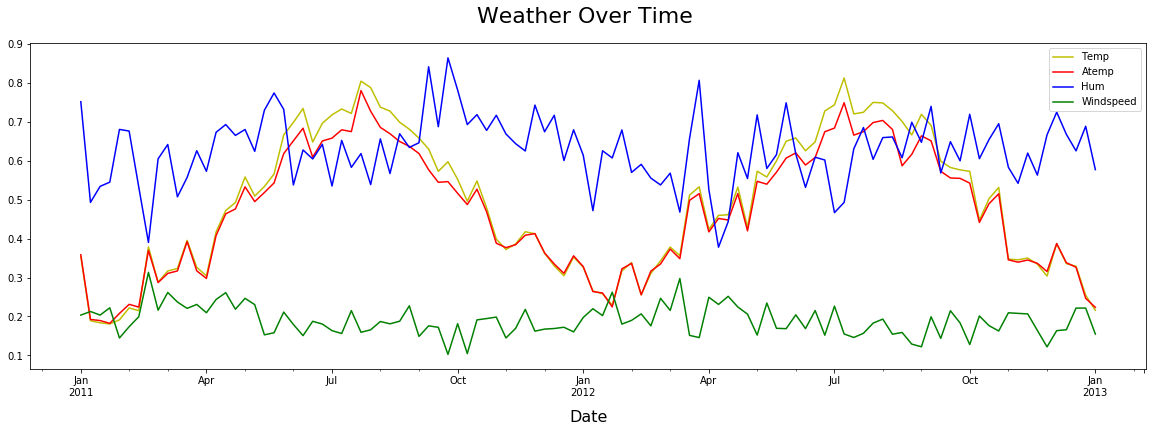

In [6]:
plt.figure(figsize=(20,6))
data.temp.resample('W').mean().plot(color='y')
data.atemp.resample('W').mean().plot(color='r')
data.hum.resample('W').mean().plot(color='b')
data.windspeed.resample('W').mean().plot(color='g')
plt.legend(['Temp','Atemp','Hum','Windspeed'], loc=1)

#pad is space between title and plot
plt.title('Weather Over Time ',fontsize = 22, pad = 20)

#labelpad is the space between xlabel and xticks
plt.xlabel('Date',fontsize = 16, labelpad = 12)
plt.show()

In [51]:
#tests
#len(x) - len(y) = 0
#len(final_y) - len(final_x) = 0
#len(x_train) - len(y_train) = 0
#len(x_test) - len(y_test ) = 0
#len(y_test) - len(x_test) = 0


In [9]:
def input_output_lstm(data,target_columns,steps,days, drop_columns = [], train_split = 0.9):
    
    """ 
    data: rows must be in order of date
    target_columns : must be a list even if it is only one column
    steps : number of past time steps you will use to predict future i.e days/hours
    days: number of time steps in the future you want to predict i.e days/hours
    """
    
    ss = StandardScaler()
    
    #Drop the rows where at least one element is missing.
    data = data.dropna()

    x_scaler = MinMaxScaler()
    
    #creating forecasted columns
    for column in target_columns:
        data[f'{column}_target'] = data[column].shift(-days)
        
    #get features, by dropping all target columns (columns which contain word target)
    features = data[data.columns.drop(list(data.filter(regex='target')))]
    
    #create dataset with dummy columns replacing non-numeric columns
    x = pd.get_dummies(features,columns = features.select_dtypes(exclude='number').columns).fillna(0)
    
    #scale x values
    x = ss.fit_transform(x)
    
    #create x where each sample in x is a list which contains data which covers the number of time steps 
    #you will use to predict future
    
    f_x = []
    
    for i in range(len(x) - steps +1):
        new_list = []
        new_list.append([x[a] for a in range(i, i+steps)])
        f_x.append(new_list)  
   
    #keras LSTM making input the right shape (no_samples,no_timesteps,no_features)
    final_x = np.array(f_x).reshape(len(f_x),steps,x.shape[1])
    
    #number of observations in training set
    num_train = int(train_split * len(final_x))
    
    #split x_data into train and test set
    x_train, x_test = final_x[:num_train], final_x[num_train:]
    

    y = data[target_columns]
    final_y = y[steps-1:]

    #split x_data into train and test set
    y_train, y_test  = final_y[0:num_train], final_y[num_train:]

    
    return x_train, x_test, y_train, y_test



In [17]:
#predicting 24 hours into the future
x_train, x_test, y_train, y_test = input_output_lstm(data2, target_columns = ['temp','hum'],steps=72, days =24)

/Users/mahtah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
len(x_train) - len(y_train)

0

In [14]:
(x_train, x_test),(y_train, y_test) = data_prep(data2, target_columns = ['temp','hum'],steps=72, days =24)

In [23]:
from keras.models import Sequential
# LSTM(100, means 100 outputs for hidden layer 1 / 100 input nodes for hidden layer 2
# tf.keras.layers.Dropout(.1) during training it will turn inputs to zero with 10% probability §
# tf.keras.layers.Dropout(.1) during predicting it will half each outputs with 10% probability (lower intensity of each signal equally)
# tf.keras.layers.Dense(2, activation='softmax') final output layer has 2 nodes (2 features we are predicting)
# it forces model to learn all the features 

model = Sequential()
model.add(LSTM(100, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.1))
#2 targets we are predicting
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(x_train, 
                   y_train, 
                   epochs=2,
                   batch_size=20,
                   validation_data=(x_test, y_test))
                   #verbose=2, 
                   #shuffle=False)

Train on 15433 samples, validate on 1715 samples
Epoch 1/2
15433/15433 [==============================] - 56s 4ms/step - loss: 0.0104 - val_loss: 0.0017
Epoch 2/2
15433/15433 [==============================] - 55s 4ms/step - loss: 0.0018 - val_loss: 4.8386e-04


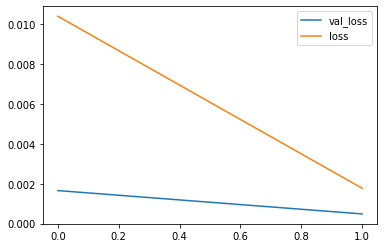

In [24]:
#visualise training loss against test loss
pd.DataFrame(history.history).plot()

In [36]:
def plot_predictions(y_test,y_pred,target_columns):
    fig, axes = plt.subplots(len(y_test[0]), 1, figsize=(20, 10))
    
    for column_no,ax,column_name in zip(range(len(y_test[0])),axes,target_columns):
        y = y_test[:,column_no]
        pred_y = y_pred[:,column_no]

        ax.plot(y, color = 'b', label = f'Actual {column_name}')
        ax.plot(pred_y, color = 'y', label = f'Predicted {column_name}')
        ax.set_ylabel(column_name)
        ax.set_xlabel('Time')

        #place legend in upper right
        ax.legend(loc=1)

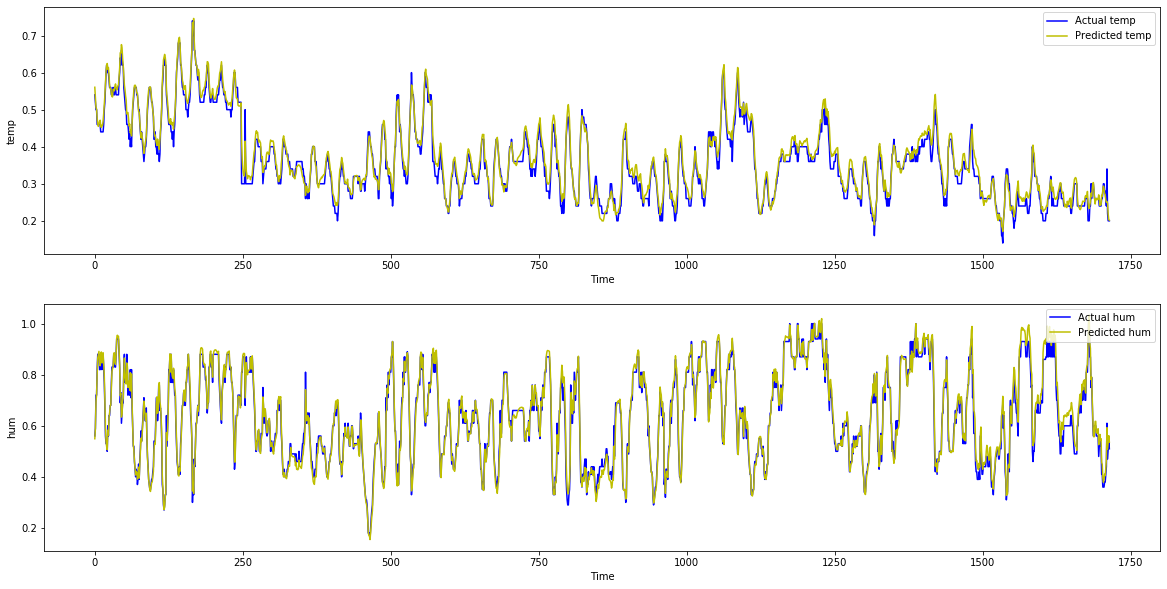

In [38]:
y_pred = model.predict(x_test)
y_test = y_test.values
plot_predictions(y_test,y_pred,target_columns=['temp','hum'])

## FB PROPHET

In [16]:
#!pip3 install --upgrade setuptools
from fbprophet import Prophet
import pystan
import pystan._misc

In [17]:
fbp_data = data2.reset_index()
#The fb prophet model takes two values 'ds' which are the dates , and 'y' the values you are trying to forecast
# y is the number of visits each day to sport related content
fbp_data = fbp_data.rename(columns={'dteday': 'ds', 'temp': 'y'})[['ds', 'y']]
fbp_data.head(30)

,ds,y
0,2011-01-01 00:00:00,0.24
1,2011-01-01 01:00:00,0.22
2,2011-01-01 02:00:00,0.22
3,2011-01-01 03:00:00,0.24
4,2011-01-01 04:00:00,0.24
5,2011-01-01 05:00:00,0.24
6,2011-01-01 06:00:00,0.22
7,2011-01-01 07:00:00,0.20
8,2011-01-01 08:00:00,0.24
9,2011-01-01 09:00:00,0.32


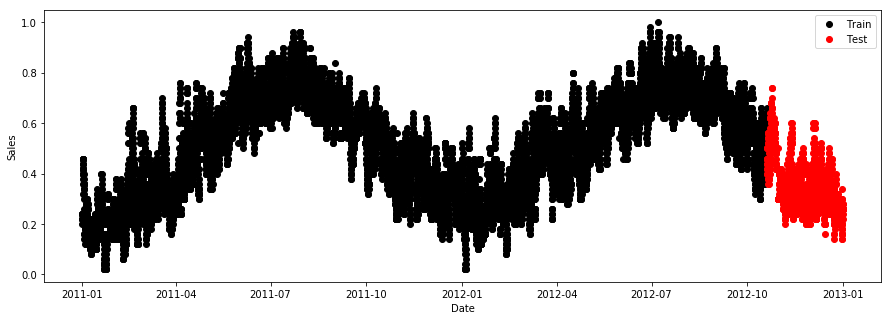

In [18]:
n_tests = int(len(fbp_data)*0.9)
df_train = fbp_data[:n_tests]
df_test = fbp_data[n_tests:]
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_train['ds'], df_train['y'], linestyle='None', marker='o', color='black', label='Train')
ax.plot(df_test['ds'], df_test['y'], linestyle='None', marker='o', color='red', label='Test')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales');